In [1]:
%matplotlib inline
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import requests
import descartes
import calendar
import seaborn as sns
import matplotlib
# Loading data (https://www.nti.org/analysis/articles/cns-north-korea-missile-test-database/). Encoding problem solved with 'unicode_escape'.
df = pd.read_csv('../data/north_korea_missile_test_database.csv', encoding= 'unicode_escape', index_col= "F1")
# Dropping unused columns.
df = df.drop(columns=['Launch Agency/Authority', 'Other Name', 'Additional Information', 'Source(s)', 'Launch Time (UTC)', 'Date Entered/Updated', 'Apogee'])
# Changing formats (str to int or float)
df['Distance Travelled'] = df['Distance Travelled'].apply(lambda x: x.replace('km', '') if isinstance(x, str) else x)
# And then, convert 'Unkown' values to numerics.
df['Distance Travelled'] = df['Distance Travelled'].replace('Unknown', 'NaN') 
# Finally, I can change it to numeric pandas table.
df['Distance Travelled'] = pd.to_numeric(df['Distance Travelled'], errors='coerce').fillna(0)
df['Landing Location'] = df['Landing Location'].apply(lambda x: x.replace('330km east of Hachinohe and 4000 km out into Pacific Ocean', '330km east of Hachinohe') if isinstance(x, str) else x)
# Changing 'location' data
df['Facility Latitude'] = pd.to_numeric(df['Facility Latitude'], errors='coerce')
df['Facility Longitude'] = pd.to_numeric(df['Facility Longitude'], errors='coerce')
# Date changes
df['Date'] = pd.to_datetime(df['Date'])
# Creating a new column for separating the year values in numeric format.
df['Year'] = df['Date'].dt.year
# Another column for changing number values to string values.
df['Month_Number'] = df['Date'].dt.month
# Another column for separating values to month specifically.
df['Month'] = df['Month_Number'].apply(lambda x: calendar.month_abbr[x])
# Another column for counting test numbers.
df["# of Test"] = 1
# Simplifying the Year/Month format.
df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')

Number of successes and failures by facility

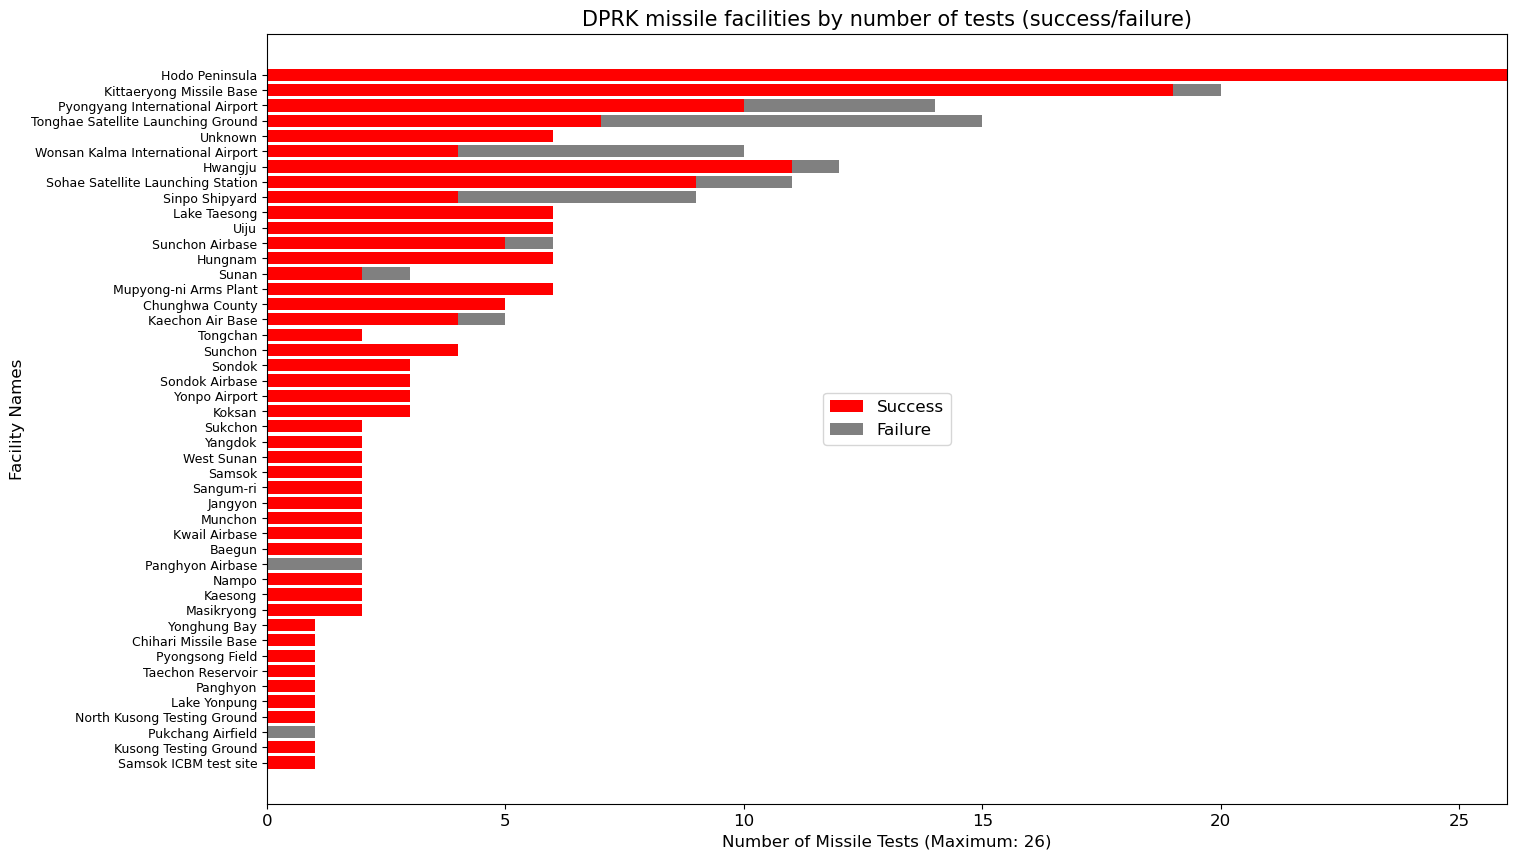

In [3]:
# Counting of total number
test_frequencies = df['Facility Name'].value_counts()
facility_names_reversed = test_frequencies.index[::-1]
facility_counts_reversed = test_frequencies.values[::-1]
# Counting Success and Failure numbers by facility name
facility_success = df.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Success').sum())
facility_failure = df.groupby('Facility Name')['Test Outcome'].apply(lambda x: (x == 'Failure').sum())
success_counts = facility_success.reindex(facility_names_reversed).values
failure_counts = facility_failure.reindex(facility_names_reversed).values
# Determine the figure size
plt.figure(figsize=(16, 10))
# Configuring the bar colors
success_color = 'red' 
failure_color = 'gray' 
# Starting to define what goes into the chart
bar_positions = np.arange(len(facility_names_reversed))
# Setting the bar
plt.barh(bar_positions, success_counts, color=success_color)
plt.barh(bar_positions, failure_counts, left=success_counts, color=failure_color)
# Additional visualization
plt.yticks(bar_positions, facility_names_reversed)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=9)
plt.xlabel('Number of Missile Tests (Maximum: 26)', size=12)
plt.ylabel('Facility Names', size=12)
plt.title('DPRK missile facilities by number of tests (success/failure)', size=15)
plt.xticks(rotation=0)
# Set the legend
legend_font_size = 12
plt.legend(['Success', 'Failure'], loc='center', prop={'size': legend_font_size})
plt.show()

Non-essential portions (background picture)

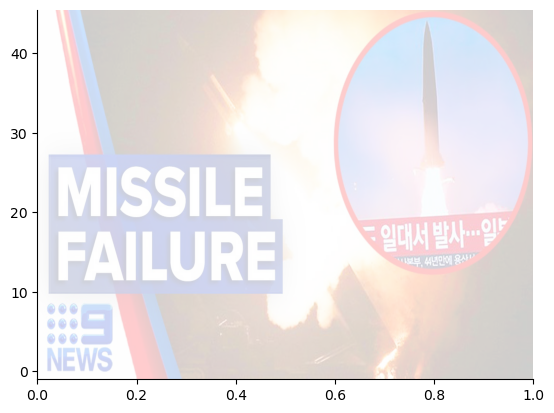

In [4]:
# Additional chart configuration - Not neccessary
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
# Removed white space before and after bars
plt.ylim(bar_positions[0]-1, bar_positions[-1]+0.5)
# Added a watermark background
watermark = plt.imread('../img/missile_failure_background.jpeg') 
x_limits = plt.xlim()
y_limits = plt.ylim()
extent = [*x_limits, *y_limits]
plt.imshow(watermark, extent=extent, aspect='auto', alpha=0.2)
plt.show()